In [ ]:
pip install matplotlib numpy pandas scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 11.4 MB/s eta 0:00:00


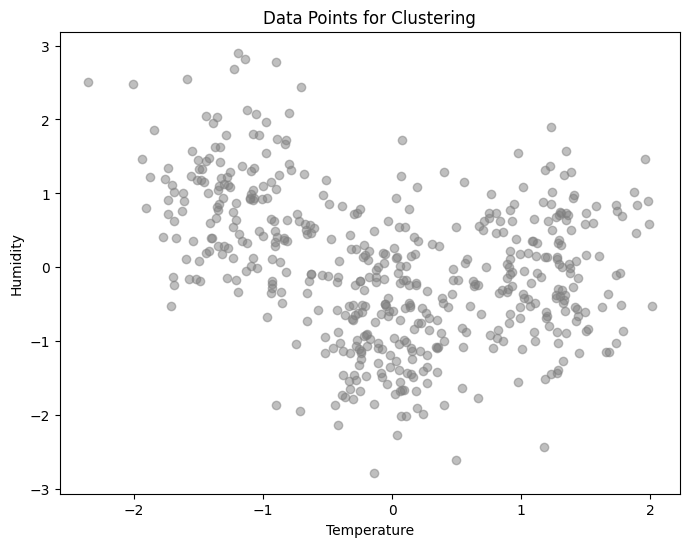

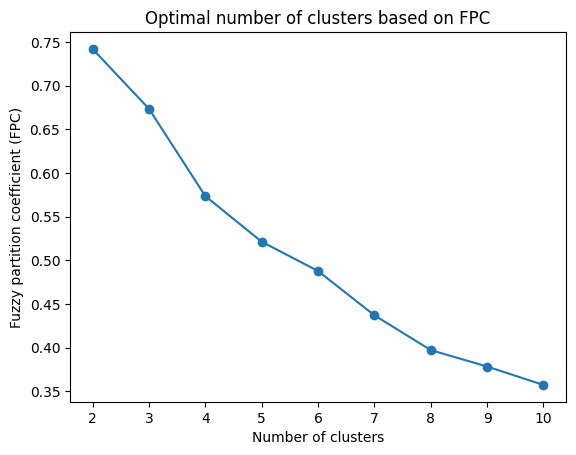

Optimal number of clusters: 2


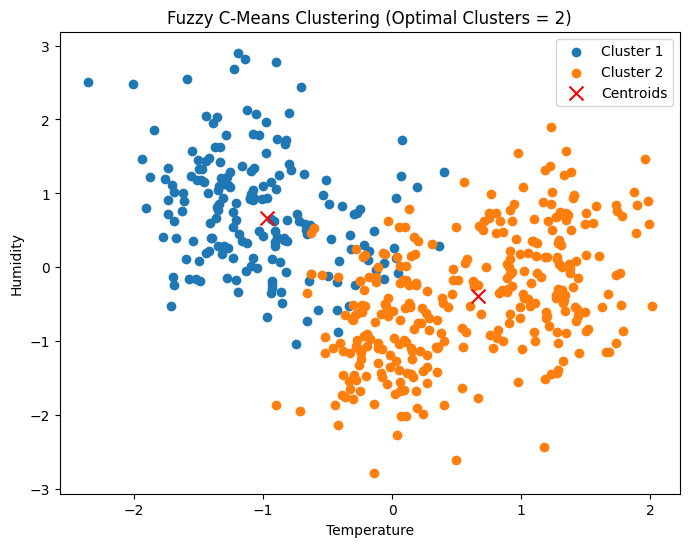


Number of clusters: 2
Partition Coefficient (PC): 0.7419672247314434
Classification Entropy (CE): 0.41158917399224704


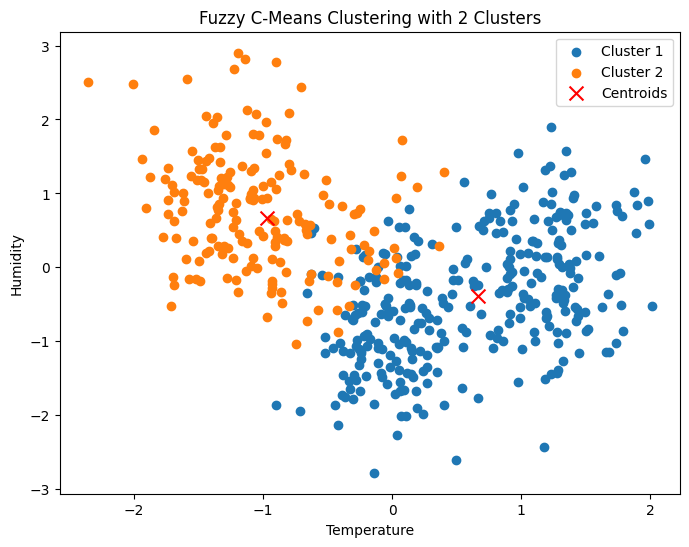


Number of clusters: 3
Partition Coefficient (PC): 0.6734354058634076
Classification Entropy (CE): 0.5919414317767714


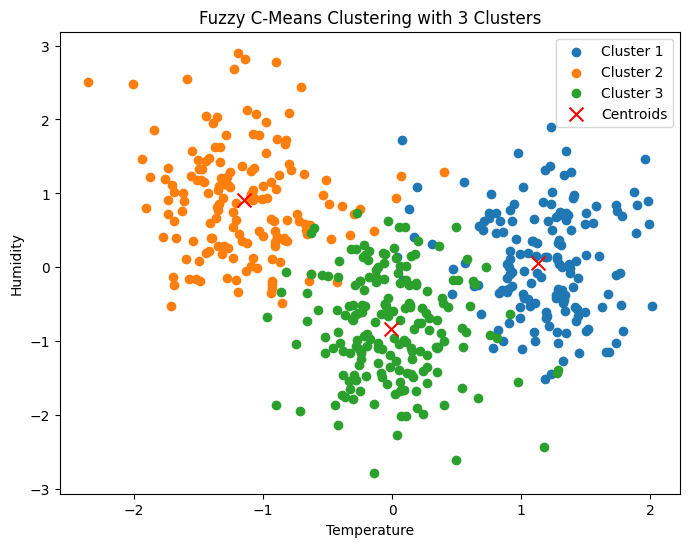


Number of clusters: 4
Partition Coefficient (PC): 0.5734370812325973
Classification Entropy (CE): 0.8162379075279712


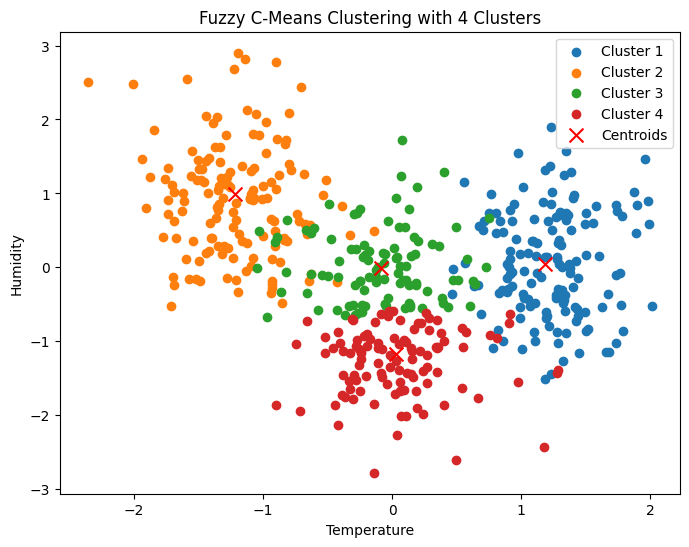


Number of clusters: 5
Partition Coefficient (PC): 0.5151818419173146
Classification Entropy (CE): 0.9637990634416166


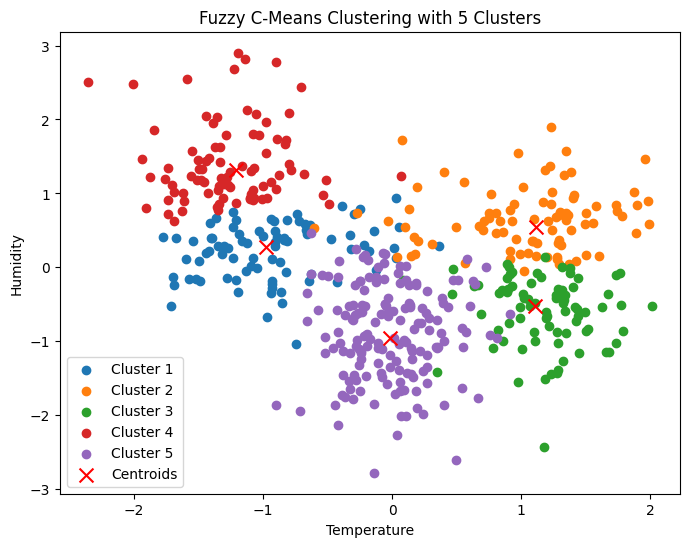


Number of clusters: 6
Partition Coefficient (PC): 0.48764695261206964
Classification Entropy (CE): 1.0643362140118728


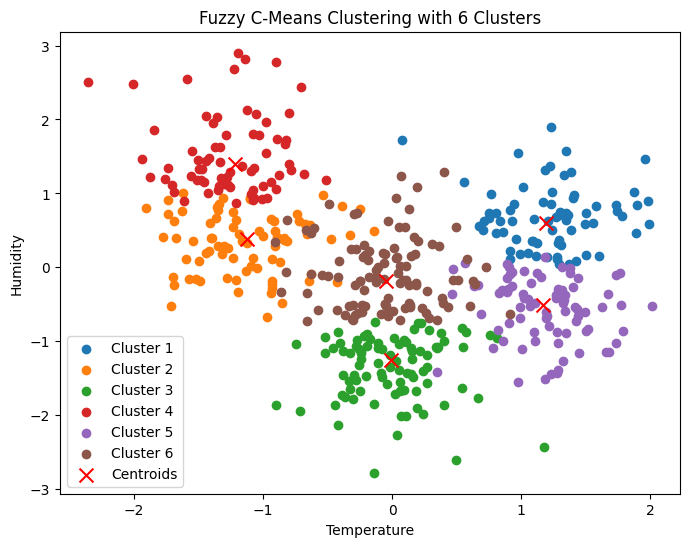


Number of clusters: 7
Partition Coefficient (PC): 0.43688348429201496
Classification Entropy (CE): 1.2068915186376032


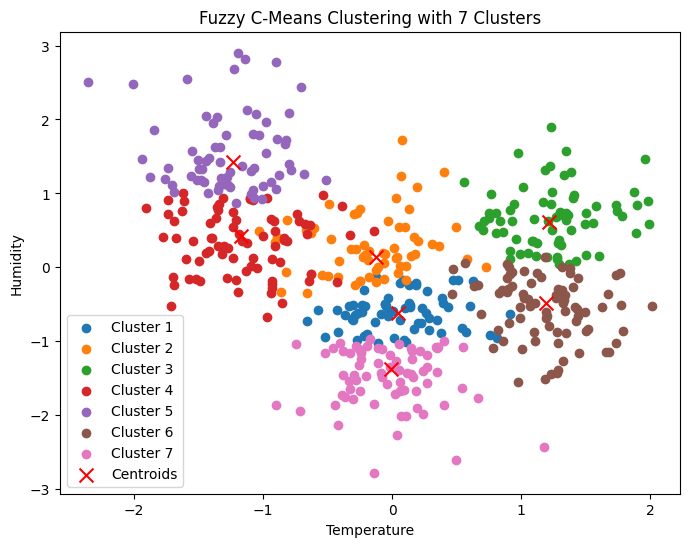


Number of clusters: 8
Partition Coefficient (PC): 0.39707722330652717
Classification Entropy (CE): 1.3346209802375437


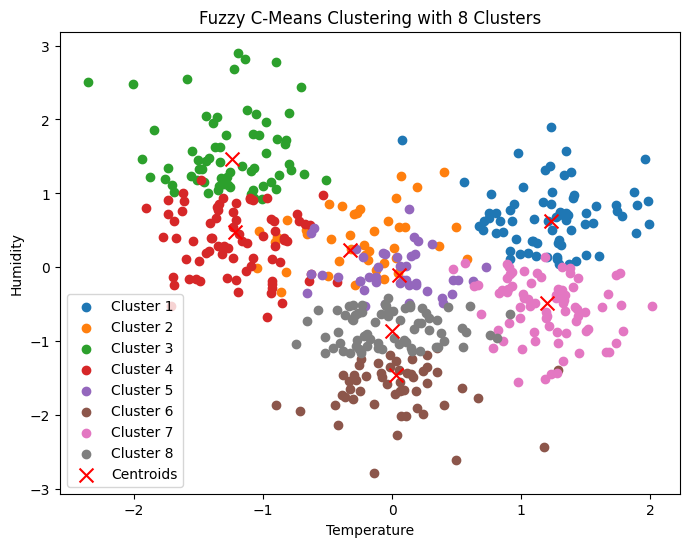


Number of clusters: 9
Partition Coefficient (PC): 0.37853691454420607
Classification Entropy (CE): 1.4099765521058525


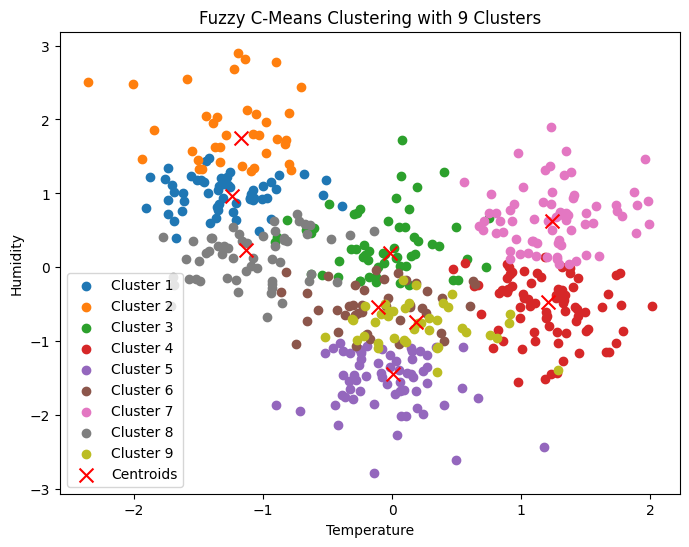


Number of clusters: 10
Partition Coefficient (PC): 0.35721660794429677
Classification Entropy (CE): 1.481915382148948


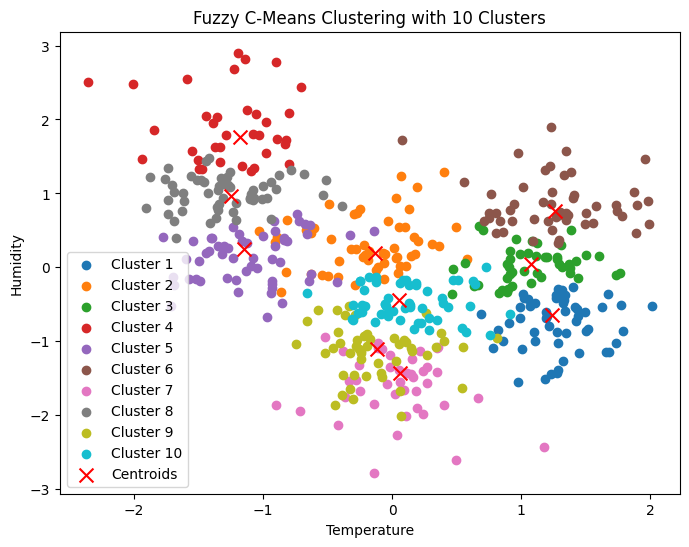

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler

# Step 1: Load the dataset
file_path = 'weather_fuzzy_cmeans_dataset.csv'  # Path to dataset
df = pd.read_csv(file_path)

# Step 2: Pre-process the dataset
scaler = StandardScaler()
data = scaler.fit_transform(df)

# Step 3: Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Data Points for Clustering')
plt.show()

# Step 4: Define Fuzzy C-means function
def fuzzy_cmeans_clustering(data, n_clusters):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data.T, c=n_clusters, m=2, error=0.005, maxiter=1000, init=None)

    cluster_labels = np.argmax(u, axis=0)  # Hard clustering label
    return cntr, cluster_labels, u, fpc

# Step 5: Apply Fuzzy C-means and find optimal number of clusters
fpc_values = []
max_clusters = 10

for n_clusters in range(2, max_clusters + 1):
    _, _, _, fpc = fuzzy_cmeans_clustering(data, n_clusters)
    fpc_values.append(fpc)

optimal_clusters = np.argmax(fpc_values) + 2  # Cluster with max FPC

plt.plot(range(2, max_clusters + 1), fpc_values, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Fuzzy partition coefficient (FPC)")
plt.title("Optimal number of clusters based on FPC")
plt.show()

print(f"Optimal number of clusters: {optimal_clusters}")

# Step 6: Print and plot the cluster centroids and labels
cntr, cluster_labels, u, fpc = fuzzy_cmeans_clustering(data, optimal_clusters)

plt.figure(figsize=(8, 6))
for j in range(optimal_clusters):
    plt.scatter(data[cluster_labels == j, 0], data[cluster_labels == j, 1], label=f'Cluster {j+1}')
plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title(f'Fuzzy C-Means Clustering (Optimal Clusters = {optimal_clusters})')
plt.legend()
plt.show()

# Step 7: Repeat for n clusters and calculate partition coefficient, classification entropy
def performance_metrics(u):
    # Partition Coefficient
    pc = np.sum(u ** 2) / u.shape[1]

    # Classification Entropy
    ce = -np.sum(u * np.log(u)) / u.shape[1]
    return pc, ce

# Testing with varying numbers of clusters
for n_clusters in range(2, max_clusters + 1):
    cntr, cluster_labels, u, fpc = fuzzy_cmeans_clustering(data, n_clusters)
    pc, ce = performance_metrics(u)

    print(f"\nNumber of clusters: {n_clusters}")
    print(f"Partition Coefficient (PC): {pc}")
    print(f"Classification Entropy (CE): {ce}")

    # Plotting each cluster configuration
    plt.figure(figsize=(8, 6))
    for j in range(n_clusters):
        plt.scatter(data[cluster_labels == j, 0], data[cluster_labels == j, 1], label=f'Cluster {j+1}')
    plt.scatter(cntr[:, 0], cntr[:, 1], c='red', marker='x', s=100, label='Centroids')
    plt.xlabel('Temperature')
    plt.ylabel('Humidity')
    plt.title(f'Fuzzy C-Means Clustering with {n_clusters} Clusters')
    plt.legend()
    plt.show()
